## Contexto y Objetivos

 

- El Ingenio La Providencia cuenta con un conjunto de datos históricos que recoge información relevante sobre la producción de caña de azúcar. Este taller tiene como objetivo que ustedes, como estudiantes, apliquen los conocimientos adquiridos en el curso para desarrollar modelos que permitan desarrollar las siguientes tareas:

 

### Regresión (HISTORICO_SUERTES.xlsx): Predecir dos variables clave:

- Toneladas de caña por hectárea (TCH): Indicador de la productividad de la tierra.
- Porcentaje de sacarosa (%Sac.Caña): Medida de la calidad de la caña y la cantidad de azúcar extraíble.


## Instrucciones Generales

 ### Parte 1: Modelo de Regresión

 ### Análisis Exploratorio de Datos (EDA):

- Realizar una exploración inicial del conjunto de datos: identificar variables relevantes, detectar valores faltantes y posibles outliers.
- Visualizar la distribución de las variables de interés (TCH y %Sac.Caña).

### Desarrollo de Modelos:

- Ajustar modelos de regresión lineal para predecir TCH y %Sac.Caña.
- Analizar la significancia de las variables, interpretar los coeficientes y evaluar los supuestos del modelo (linealidad, homocedasticidad, normalidad de errores, etc.).
- Diagnosticar posibles problemas como la multicolinealidad o la presencia de observaciones atípicas, y proponer soluciones (por ejemplo, técnicas de regularización).
 
### Validación y Evaluación:

- Utilizar estrategias de validación (holdout y/o validación cruzada) para evaluar el desempeño del modelo.
- Calcular al menos dos métricas de evaluación apropiadas (por ejemplo, R², RMSE, MAE) y discutir los resultados.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

# Configuración de visualización de gráficos
sns.set_theme(style="whitegrid", palette="pastel")

# Cargar el dataset
file_path = 'HISTORICO_SUERTES.xlsx'
df = pd.read_excel(file_path)

# Mostrar las primeras filas del dataset
df.head()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Describimos las columnas para anlizar cantidad de datos y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

- Se observan 4 columnas de fecha, 67 columnas numericas y 14 objects, podemos ademas ver que el total maximo de filas es 21027 sin embargo para una de nuestras variables objetivo ( %Sac.Caña) la cantidad es menor (20578) y hay variables con un % bajo de datos sobre el total de filas 

#### vamos a identificar que columnas tienen poca cantidad de datos con respecto a nuestras variables objetivos
- con esto podemos analizar si las variables pueden ser relevantes o no 

In [4]:
# Calcular el umbral del 50% del total de datos
threshold = len(df) * 0.5

# Identificar las columnas con cantidad de datos no nulos inferior al umbral
columns_below_threshold = df.columns[df.isnull().sum() < threshold]

# Filtrar las columnas que tienen menos del 50% de datos no nulos
columns_below_threshold = df.columns[df.isnull().sum() > threshold]

# Mostrar las columnas identificadas
print(columns_below_threshold)

Index(['D.S.', 'Ult.Riego', 'Edad.Precosecha', 'Num.Riegos', '%Infest.Diatrea',
       'Fert.Nitrogen.', 'Urea 46%', 'MEZ', 'Boro Granul.', 'MicroZinc',
       'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S', 'Vinaza', 'Codigo Estacion',
       'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo',
       'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo',
       'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ciclo',
       'Sum Oscilacion Temp Ciclo', 'Radicion Solar 0-3',
       'Radiacion Solar Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo',
       'Evaporacion 0-3', 'Evaporacion Ciclo'],
      dtype='object')


In [12]:
# Identificar las columnas de tipo object
categorical_columns = df.select_dtypes(include=['object']).columns

# Mostrar las columnas categóricas
print(categorical_columns)

# Contar valores únicos en cada columna categórica
unique_counts = df[categorical_columns].nunique()

# Mostrar los conteos de valores únicos
print(unique_counts)

Index(['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'D.S.',
       'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó',
       'Codigo Estacion'],
      dtype='object')
Nombre              914
Zona                  7
Suerte             1220
Suelo               102
Variedad             58
Cod.Estado           32
D.S.                  3
Cultivo               2
Producto             18
Tipo Quema            5
T.Corte               4
Cerca de             31
Cosechó              14
Codigo Estacion      20
dtype: int64


In [13]:
# Filtrar las columnas categóricas con menos de 10 valores únicos
categorical_columns_less_than_10 = unique_counts[unique_counts < 10].index

# Mostrar los valores únicos de estas columnas
for column in categorical_columns_less_than_10:
    print(f"Valores únicos en la columna '{column}':")
    print(df[column].unique())
    print()

Valores únicos en la columna 'Zona':
['IP02' 'IP05' 'IP06' 'IP03' 'IP01' 'ip05' 'IC07']

Valores únicos en la columna 'D.S.':
[nan '1.65' 'DS' '1.5']

Valores únicos en la columna 'Cultivo':
['Normal' 'Organico' nan]

Valores únicos en la columna 'Tipo Quema':
['VERDE' 'Q.ACCIDENTAL' 'Q.PROGRAMADA' 'SEMILLA' 'NO DEF.']

Valores únicos en la columna 'T.Corte':
['MECANIZADO' 'MANUAL' 'NO DEF.' 'SEMILLA']



In [14]:
# Contar registros por cada valor en las columnas categóricas con menos de 10 valores únicos
for column in categorical_columns_less_than_10:
    print(f"Conteo de registros por valor en la columna '{column}':")
    print(df[column].value_counts())
    print()

Conteo de registros por valor en la columna 'Zona':
Zona
IP05    7813
IP03    5184
IP06    4113
IP01    2307
IP02    1595
ip05      14
IC07       1
Name: count, dtype: int64

Conteo de registros por valor en la columna 'D.S.':
D.S.
1.65    7148
DS        19
1.5        1
Name: count, dtype: int64

Conteo de registros por valor en la columna 'Cultivo':
Cultivo
Normal      20266
Organico      759
Name: count, dtype: int64

Conteo de registros por valor en la columna 'Tipo Quema':
Tipo Quema
VERDE           16204
Q.ACCIDENTAL     2470
Q.PROGRAMADA     1536
NO DEF.           523
SEMILLA           294
Name: count, dtype: int64

Conteo de registros por valor en la columna 'T.Corte':
T.Corte
MECANIZADO    17121
MANUAL         3363
NO DEF.         542
SEMILLA           1
Name: count, dtype: int64



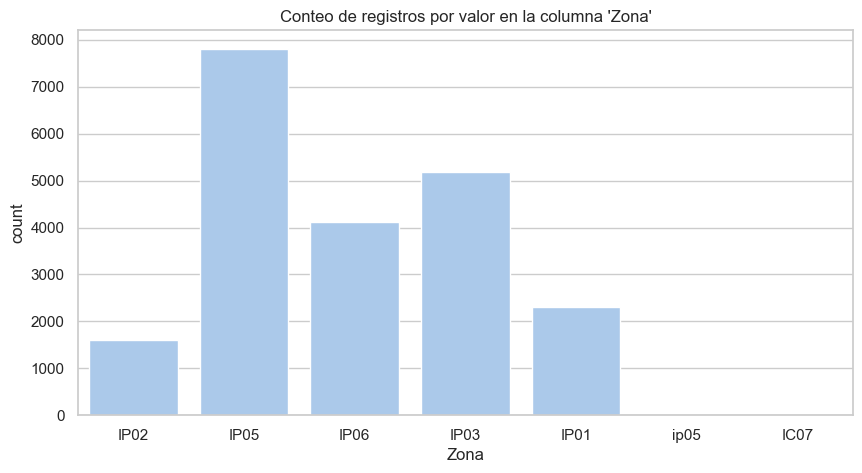

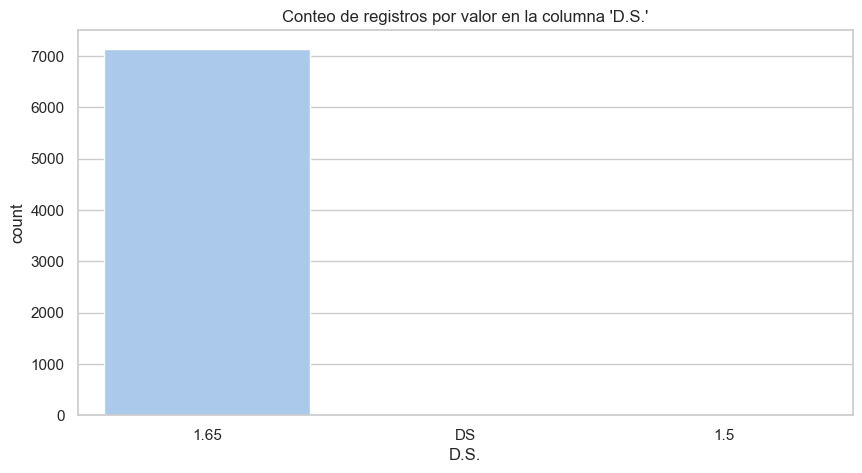

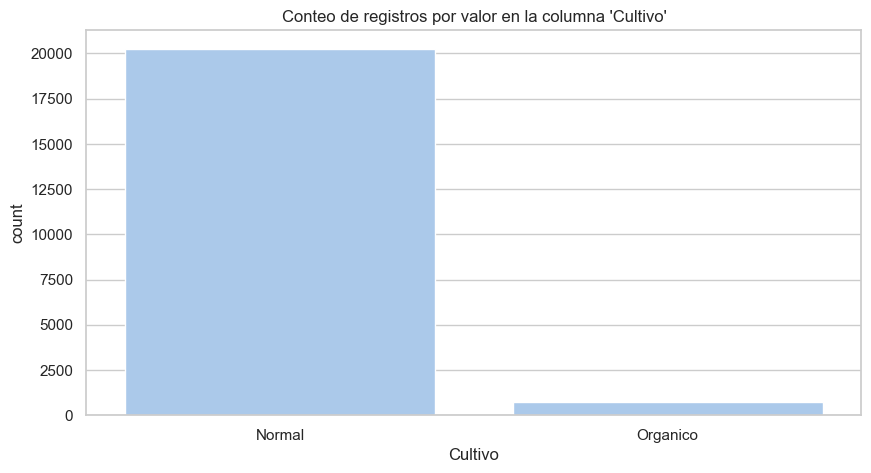

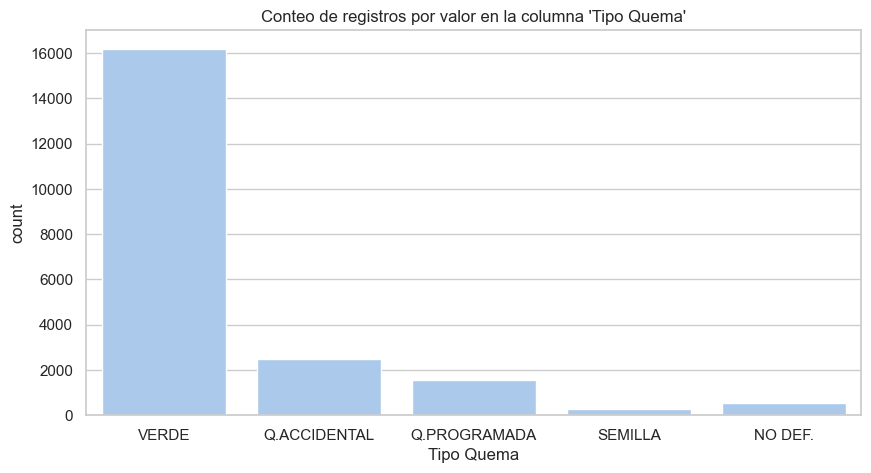

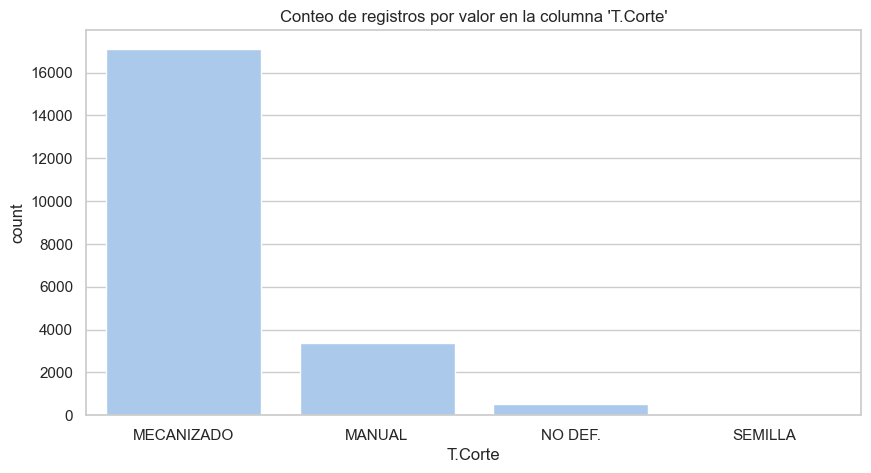

In [16]:
#Graficamos la cantidad de registros por cada valor en las columnas categóricas con menos de 10 valores únicos
for column in categorical_columns_less_than_10:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column)
    plt.title(f"Conteo de registros por valor en la columna '{column}'")
    plt.show()

- Al hacer esa exploracion de datos podemos observar que hay variables categoricas que aportan sesgo a los datos debido a que no estan balanceadas en sus diferentes valores

In [11]:
# Contar valores nulos en cada columna
null_counts = df.isnull().sum()
print(null_counts)




Período                      0
Hacienda                     0
Nombre                       0
Zona                         0
Tenencia                     1
                         ...  
Radiacion Solar Ciclo    16497
Precipitacion 0_3        16497
Precipitacion Ciclo      16497
Evaporacion 0-3          16497
Evaporacion Ciclo        16497
Length: 85, dtype: int64


- al revisar valores nulos encontramos que existen columnas con un gran % de valores nulos con respecto a la cantidad de datos de la la variable objetivo, esto nos lleva a plantearnos la pregunta si estos datos son o no relevantes para el modelo predictivo